**Requisiti**

In [ ]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 3.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

**Import del modello**

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, TextStreamer
from transformers import pipeline
import torch

model_id = "MaziyarPanahi/Llama-3-8B-Instruct-v0.8"

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    trust_remote_code=True,
    # attn_implementation="flash_attention_2"
)

tokenizer = AutoTokenizer.from_pretrained(
    model_id,
    trust_remote_code=True
)

streamer = TextStreamer(tokenizer)

pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    model_kwargs={"torch_dtype": torch.bfloat16},
    streamer=streamer
)

# Then you can use the pipeline to generate text.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/715 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/6.11G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/169 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


**Import del dataset**

In [ ]:
import csv
import pandas as pd

# Funzione per correggere automaticamente il CSV
def clean_csv(input_path, output_path):
    with open(input_path, 'r', encoding='utf-8') as infile, open(output_path, 'w', encoding='utf-8') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        for row in reader:
            # Correggi righe problematiche qui, ad esempio rimuovendo virgolette non chiuse
            cleaned_row = [field.replace('"', '') for field in row]
            writer.writerow(cleaned_row)

clean_csv('/content/Fake.csv', '/content/Clean_Fake.csv')
df = pd.read_csv('/content/Clean_Fake.csv')


**Separazione delle colonne del dataset**

In [ ]:
# Accesso a una singola colonna
colonna_title = df['title']
colonna_text = df['text']
colonna_subject = df['subject']
colonna_date = df['date']

In [ ]:
print(colonna_text[2])
print(len(colonna_text[2]))

On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In January, there was a brief run-in on a plane between Clarke and fellow passenger Dan Black, who he later had detained by the police for no reason whatsoever, except that maybe his feelings were hurt. Clarke messaged the police to stop Black after he deplaned, and now, a search warrant has been executed by the FBI to see the exchanges.Clarke is calling it fake news even though copies of the search warrant are on the Internet. I am UNINTIMIDATED by lib media attempts to smear and discredit me with their FAKE NEWS reports designed to silence me,  the former sheriff tweeted.  I will continue to poke them in the eye with a sharp stick and bitch slap these scum bags til they get it. I have been attacked by better people than them #MAGA I am UNINTIMIDATED by lib media attempts to smear and discredit

**Utilizzo del modello**

In [ ]:
# Liberare la cache della GPU
torch.cuda.empty_cache()

#Esecuzione del modello:
#Nel content di sistema gli dico chi è
#Nel content del user è come la chat di chatgpt dove gli chiedo cosa fare
messages = [
        {"role": "system", "content": "You are a bot that extracts representative elements of its high-level objective from the text"},
        {"role": "user", "content": f"{colonna_text[2]}, Read the following text and identify its high-level objective and a list of subjects, verbs, object complements and their relations. The high-level objective is a concise, general summary that describes the main purpose of the text. The subject is who or what performs the action, the verb is the action itself, and the object complement is on whom or what the action falls. For example: Text: (Donald Trump Sends Out Embarrassing New Year's Eve Message) High-level target: (Trump defamation) Subject: (Donald Trump) Verb: (sends) Complement: (Embarrassing New Year's Eve message). Print the output in the following format: High level target: \n Phrase: (subject) (verb) (complement)"}
    ]

prompt = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True
)

terminators = [
    tokenizer.eos_token_id,
    tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = pipeline(
    prompt,
    max_new_tokens=512,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.95,
)
print(outputs[0]["generated_text"][len(prompt):])



Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You are a bot that extracts representative elements of its high-level objective from the text<|eot_id|><|start_header_id|>user<|end_header_id|>

On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In January, there was a brief run-in on a plane between Clarke and fellow passenger Dan Black, who he later had detained by the police for no reason whatsoever, except that maybe his feelings were hurt. Clarke messaged the police to stop Black after he deplaned, and now, a search warrant has been executed by the FBI to see the exchanges.Clarke is calling it fake news even though copies of the search warrant are on the Internet. I am UNINTIMIDATED by lib media attempts to smear and discredit me with their FAKE NEWS reports designed to silence me,  the former sheriff tweeted.  I will continue to

In [ ]:
# Supponiamo che 'output_text' contenga il testo generato dal modello
output_text = outputs[0]["generated_text"]

# Regex per estrarre le frasi con il formato desiderato
regex = r"Phrase: \((.*?)\) \((.*?)\) \((.*?)\)"

# Vettori per salvare soggetti, verbi e complementi oggetto
subjects = []
verbs = []
objects = []

# Trova tutte le frasi nel testo usando il regex
matches = re.findall(regex, output_text)

# Itera su ogni corrispondenza e estrai soggetto, verbo e complemento oggetto
for match in matches:
    subject = match[0]
    verb = match[1]
    obj = match[2]

    # Aggiungi a ciascun vettore
    subjects.append(subject)
    verbs.append(verb)
    objects.append(obj)

# Stampa i risultati
print("Subjects:", subjects)
print("Verbs:", verbs)
print("Objects:", objects)


Subjects: ['subject', 'Clarke', 'Clarke', 'Clarke', 'Clarke', 'Clarke', "Clarke's followers", 'Clarke', 'Ike Barinholtz']
Verbs: ['verb', 'has', 'detained', 'tweeted', 'tweeted', 'tweeted', 'called him out', 'called', 'tweeted']
Objects: ['complement', 'email scandal of his own', 'Black', 'about being un intimidated', 'about fighting back at fake news', 'about not backing down', 'on his behavior', 'police', 'at Clarke']


In [ ]:
#import re

# Supponiamo che 'output_text' contenga il testo generato dal modello
#output_text = outputs[0]["generated_text"]

# Funzione per estrarre la seconda lista da una sezione specifica del testo
#def extract_second_list(section_title, text):
 #   pattern = rf'{section_title}:\s*([\s\S]*?)(?=\n[A-Z][a-z]+:|$)'
  #  matches = re.findall(pattern, text)
   # if len(matches) > 1:
    #    items = matches[1].strip().split('\n')
     #   items = [item.strip('- ').strip() for item in items if item.strip()]
      #  return items
    #return []

# Funzione per estrarre il secondo "High level target"
#def extract_second_high_level_target(text):
 #   pattern = r'High level target:\s*([\s\S]*?)(?=Subjects:|$)'
  #  matches = re.findall(pattern, text)
   # if len(matches) > 1:
    #    return matches[1].strip()
    #return ""

# Estrarre il high level target
#high_level_target = extract_second_high_level_target(output_text)

# Estrarre le liste di soggetti, verbi e oggetti
#subjects = extract_second_list('Subjects', output_text)
#verbs = extract_second_list('Verbs', output_text)
#objects = extract_second_list('Objects', output_text)

# Stampare i risultati
#print('High level target:', high_level_target)
#print('Subjects:', subjects)
#print('Verbs:', verbs)
#print('Objects:', objects)


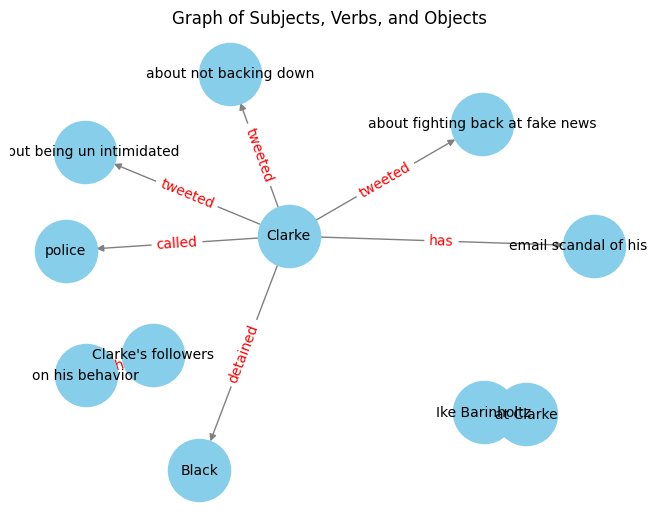

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Creazione di un grafo diretto
G = nx.DiGraph()

# Aggiungi archi e nodi al grafo
for i in range(1, len(subjects)):  # partiamo da 1 per saltare 'subject', 'verb', 'complement'
    subject = subjects[i]
    verb = verbs[i]
    obj = objects[i]

    # Aggiungi i nodi (soggetto e oggetto)
    G.add_node(subject)
    G.add_node(obj)

    # Aggiungi l'arco (soggetto -> oggetto) con l'etichetta del verbo
    G.add_edge(subject, obj, label=verb)

# Disegna il grafo
pos = nx.spring_layout(G, seed=42)  # disposizione dei nodi con un seed per riproducibilità
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black', edge_color='gray', arrows=True)

# Aggiungi etichette agli archi (verbi)
edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Mostra il grafo
plt.title('Graph of Subjects, Verbs, and Objects')
plt.show()

In [ ]:
!pip install neo4j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.5/293.5 kB 1.7 MB/s eta 0:00:00


In [ ]:
from neo4j import GraphDatabase

# Funzione per caricare il grafo in Neo4j
def load_graph_to_neo4j(subjects, verbs, objects, uri, user, password):
    # Connessione al database Neo4j
    driver = GraphDatabase.driver(uri, auth=(user, password))

    # Creazione di una sessione di Neo4j
    with driver.session() as session:
        # Creazione dei nodi per i soggetti
        for subject in subjects[1:]:  # partiamo da 1 per saltare 'subject'
            session.run("MERGE (:Node {name: $name, type: 'subject'})", name=subject)

        # Creazione dei nodi per gli oggetti
        for obj in objects[1:]:  # partiamo da 1 per saltare 'complement'
            session.run("MERGE (:Node {name: $name, type: 'object'})", name=obj)

        # Creazione degli archi con i verbi
        for i in range(1, len(subjects)):
            subject = subjects[i]
            verb = verbs[i]
            obj = objects[i]

            session.run("MATCH (start:Node {name: $subject}) "
                        "MATCH (end:Node {name: $obj}) "
                        "MERGE (start)-[:RELATION {verb: $verb}]->(end)",
                        subject=subject, obj=obj, verb=verb)

    # Chiusura della connessione
    driver.close()

# URI, username e password per connettersi a Neo4j Aura
uri = "neo4j+s://eee81b68.databases.neo4j.io:7687"
username = "neo4j"
password = "0BDKzee5lvJbN4CwoMyGFOyDVkE6tiHN7fji33Lybr0"

# Carica il grafo in Neo4j
load_graph_to_neo4j(subjects, verbs, objects, uri, username, password)

print("Grafo caricato con successo su Neo4j.")



ModuleNotFoundError: No module named 'neo4j'